<a href="https://colab.research.google.com/github/ZUBCR-10/PythonPrediction/blob/main/PythonPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de prediccion del clima


In [ ]:
from google.colab import files
uploaded = files.upload()

Cargamos pandas y leemos los datos

In [ ]:
import io
import pandas as pd
Base_Datos = pd.read_csv(io.BytesIO(uploaded['BaseDatos.csv']))

Hacemos una primera inspeccion para ver que se haya cargado bien

In [ ]:
Base_Datos

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00022516,"KAHULUI AIRPORT, HI US",2012-07-17,0.00,84.0,73.0
1,USW00022516,"KAHULUI AIRPORT, HI US",2012-07-18,0.00,86.0,74.0
2,USW00022516,"KAHULUI AIRPORT, HI US",2012-07-19,0.00,85.0,72.0
3,USW00022516,"KAHULUI AIRPORT, HI US",2012-07-20,0.00,85.0,70.0
4,USW00022516,"KAHULUI AIRPORT, HI US",2012-07-21,0.00,87.0,65.0
...,...,...,...,...,...,...
3648,USW00022516,"KAHULUI AIRPORT, HI US",2022-07-13,0.02,88.0,75.0
3649,USW00022516,"KAHULUI AIRPORT, HI US",2022-07-14,0.00,89.0,74.0
3650,USW00022516,"KAHULUI AIRPORT, HI US",2022-07-15,0.00,89.0,73.0
3651,USW00022516,"KAHULUI AIRPORT, HI US",2022-07-16,NaN,NaN,NaN


Verificamos una sola columna en esta ocasion la temperatura maxima y vemos que hacen falta datos

In [ ]:
Base_Datos["TMAX"]

0       84.0
1       86.0
2       85.0
3       85.0
4       87.0
        ... 
3648    88.0
3649    89.0
3650    89.0
3651     NaN
3652     NaN
Name: TMAX, Length: 3653, dtype: float64

Vemos la composicion de los datos

In [ ]:
Base_Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  3653 non-null   object 
 1   NAME     3653 non-null   object 
 2   DATE     3653 non-null   object 
 3   PRCP     3644 non-null   float64
 4   TMAX     3643 non-null   float64
 5   TMIN     3643 non-null   float64
dtypes: float64(3), object(3)
memory usage: 171.4+ KB


Descripcion estadistica de la base de datos

In [ ]:
Base_Datos.describe()

,PRCP,TMAX,TMIN
count,3644.000000,3643.000000,3643.000000
mean,0.050744,85.850398,68.480922
std,0.248327,4.195899,4.725276
min,0.000000,70.000000,52.000000
25%,0.000000,83.000000,65.000000
50%,0.000000,86.000000,69.000000
75%,0.010000,89.000000,72.000000
max,6.400000,97.000000,79.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44bb3f74d0>,
      dtype=object)

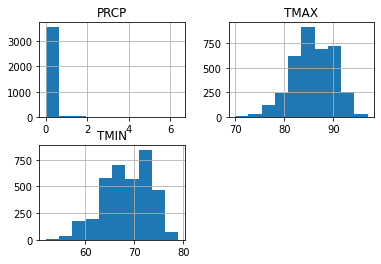

In [ ]:
Base_Datos.hist()

Procedemos a eliminar los datos que no son necesarios

In [ ]:
Base_Datos = Base_Datos.drop(columns=['STATION'])
Base_Datos = Base_Datos.drop(columns=['NAME'])
Base_Datos = Base_Datos.drop(columns=['DATE'])

In [ ]:
Base_Datos.isna().sum()

PRCP     9
TMAX    10
TMIN    10
dtype: int64

Rellenamos con ceros en las varibles incompletas




In [ ]:
Base_Datos["PRCP"] = Base_Datos["PRCP"].fillna(0)
Base_Datos["TMAX"] = Base_Datos["TMAX"].fillna(0)
Base_Datos["TMIN"] = Base_Datos["TMIN"].fillna(0)

Base_Datos

,PRCP,TMAX,TMIN
0,0.00,84.0,73.0
1,0.00,86.0,74.0
2,0.00,85.0,72.0
3,0.00,85.0,70.0
4,0.00,87.0,65.0
...,...,...,...
3648,0.02,88.0,75.0
3649,0.00,89.0,74.0
3650,0.00,89.0,73.0
3651,0.00,0.0,0.0


Analizamos mediante graficos los datos DE TMAX VS TMIN

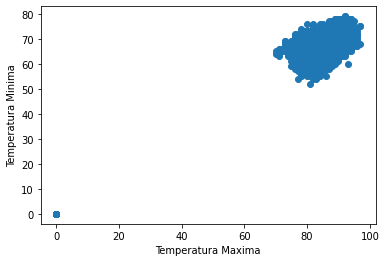

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x= Base_Datos['TMAX'], y= Base_Datos['TMIN']) 
plt.xlabel('Temperatura Maxima')
plt.ylabel('Temperatura Minima')
plt.show()

Eliminamos los datos que se salen del rango

In [ ]:
Base_Datos = Base_Datos.query('TMAX>60')
Base_Datos = Base_Datos.query('TMIN>50')

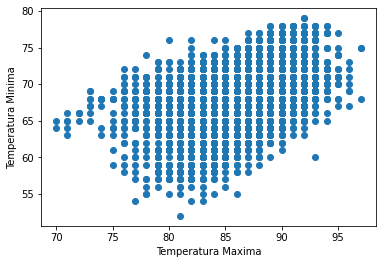

In [ ]:
plt.scatter(x= Base_Datos['TMAX'], y= Base_Datos['TMIN']) 
plt.xlabel('Temperatura Maxima')
plt.ylabel('Temperatura Minima')
plt.show()

Analizamos mediante graficos los datos DE PRCP VS TMAX

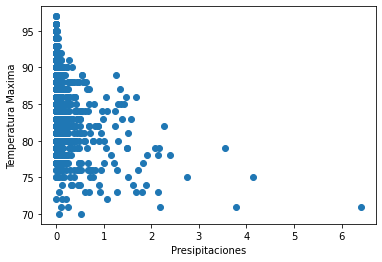

In [ ]:
plt.scatter(x= Base_Datos['PRCP'], y= Base_Datos['TMAX']) 
plt.xlabel('Presipitaciones')
plt.ylabel('Temperatura Maxima')
plt.show()

In [ ]:
Base_Datos = Base_Datos.query('PRCP<2')

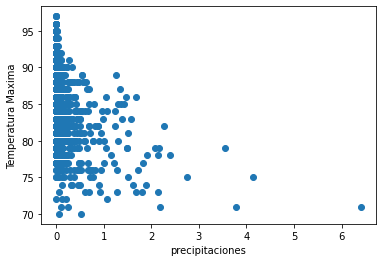

In [ ]:
plt.scatter(x= Base_Datos['PRCP'], y= Base_Datos['TMAX']) 
plt.xlabel('precipitaciones')
plt.ylabel('Temperatura Maxima')
plt.show()

Analizamos mediante graficos los datos DE PRCP VS TMIN

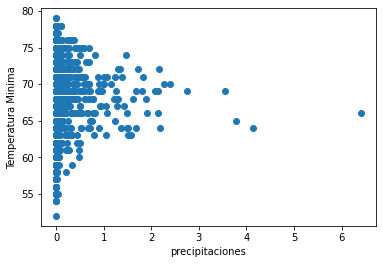

In [ ]:
plt.scatter(x= Base_Datos['PRCP'], y= Base_Datos['TMIN']) 
plt.xlabel('precipitaciones')
plt.ylabel('Temperatura Minima')
plt.show()

In [ ]:
Base_Datos

,PRCP,TMAX,TMIN
0,0.00,84.0,73.0
1,0.00,86.0,74.0
2,0.00,85.0,72.0
3,0.00,85.0,70.0
4,0.00,87.0,65.0
...,...,...,...
3646,0.00,89.0,75.0
3647,0.01,87.0,70.0
3648,0.02,88.0,75.0
3649,0.00,89.0,74.0


Fase de entramiento del modelo de machine learning

Separamos los datos de entrenamiento 80% y de test 20%

In [ ]:
Datos_entrenamiento = Base_Datos.sample(frac=0.8,random_state=0)
Datos_test = Base_Datos.drop(Datos_entrenamiento.index)

In [ ]:
Datos_entrenamiento

,PRCP,TMAX,TMIN
443,0.0,89.0,69.0
1752,0.0,86.0,74.0
989,0.0,88.0,64.0
2582,0.0,93.0,70.0
2879,0.0,91.0,71.0
...,...,...,...
409,0.0,90.0,67.0
2692,0.0,85.0,74.0
1623,0.0,82.0,71.0
115,0.0,85.0,71.0


In [ ]:
Datos_test

,PRCP,TMAX,TMIN
0,0.00,84.0,73.0
3,0.00,85.0,70.0
7,0.02,86.0,72.0
21,0.01,87.0,67.0
24,0.00,85.0,73.0
...,...,...,...
3622,0.00,89.0,74.0
3623,0.00,91.0,76.0
3626,0.00,88.0,68.0
3643,0.01,88.0,73.0


Marcamos el valor a predecir en ambas bases

In [ ]:
etiqueta_entrenamiento = Datos_entrenamiento.pop('PRCP')
etiqueta_test = Datos_test.pop('PRCP')

Revisamos los datos

In [ ]:
etiqueta_entrenamiento

443     0.0
1752    0.0
989     0.0
2582    0.0
2879    0.0
       ... 
409     0.0
2692    0.0
1623    0.0
115     0.0
288     0.0
Name: PRCP, Length: 2914, dtype: float64

In [ ]:
etiqueta_test

0       0.00
3       0.00
7       0.02
21      0.01
24      0.00
        ... 
3622    0.00
3623    0.00
3626    0.00
3643    0.01
3644    0.00
Name: PRCP, Length: 729, dtype: float64

In [ ]:
Datos_entrenamiento

,TMAX,TMIN
443,89.0,69.0
1752,86.0,74.0
989,88.0,64.0
2582,93.0,70.0
2879,91.0,71.0
...,...,...
409,90.0,67.0
2692,85.0,74.0
1623,82.0,71.0
115,85.0,71.0


Le ensenamos a nuestro modelo regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(Datos_entrenamiento,etiqueta_entrenamiento)

LinearRegression()

Ejecutamos las pruebas

In [ ]:
Predicciones = modelo.predict(Datos_test)
Predicciones

array([ 0.13073901,  0.08337668,  0.07828698,  0.0140156 ,  0.10874026,
        0.10028573,  0.042744  ,  0.05628823,  0.03601435,  0.03937918,
        0.0140156 ,  0.02583495, -0.00798315,  0.01065078,  0.05292341,
       -0.0012535 , -0.02661708,  0.06137793,  0.11555484,  0.09864579,
        0.03437441,  0.10710031,  0.14091842,  0.18491592,  0.09528096,
        0.04282893,  0.03437441,  0.13082394,  0.18491592,  0.13246389,
        0.15109782,  0.0292847 ,  0.19000562,  0.19337045,  0.12745912,
        0.12236942,  0.22891343,  0.21709408,  0.16800687,  0.17309657,
        0.05128346,  0.15618752,  0.21709408, -0.05534548, -0.02825703,
        0.06983246, -0.01134798,  0.02247013,  0.042744  , -0.04180125,
       -0.07225453,  0.04110405,  0.01738043,  0.08001186,  0.0376543 ,
        0.05628823,  0.06137793,  0.08337668,  0.10874026,  0.00720102,
       -0.00461833, -0.0299819 ,  0.09183121,  0.01229072,  0.0478337 ,
        0.02919978, -0.04861583,  0.01738043,  0.05119853, -0.00

Comparamos con los valores reales

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
error= np.sqrt(mean_squared_error(etiqueta_test, Predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 17.932179


Ahora vamos a ingresar los datos de la temperatura para que nos de una prediccion

In [ ]:
Precipitaciones= pd.DataFrame(np.array([[20,89]]),columns=['TMAX','TMIN'])
Precipitaciones

NameError: ignored

In [ ]:
modelo.predict(Precipitaciones)

array([0.8786966])